In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import pandas as pd
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,post,label
0,simply copy and paste the following text into ...,0
1,in order to help increase the booklets downloa...,0
2,as of march 13th 2014 the booklet had been dow...,0
3,click below for a free download of a colorfull...,1
4,click on the download 7 42 mb green banner link,0


In [ ]:
df.shape #BUG: ADD SOMEHOW 2 MORE LINES

(45600, 2)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(45599, 2)

In [ ]:
# df.label = df.label.astype(int)

In [ ]:
df.head()

,post,label
0,simply copy and paste the following text into ...,0
1,in order to help increase the booklets downloa...,0
2,as of march 13th 2014 the booklet had been dow...,0
3,click below for a free download of a colorfull...,1
4,click on the download 7 42 mb green banner link,0


## Pre-processing text data

- Most of the text data are cleaned by following below steps:
    1. Lammetization - Tranforming any form of a word to its root word
    2. Tokenization - Converting a sentence into list of words
    3. Remove punctuations
    4. Remove stopwords

In [ ]:
! pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
def tokenization(text):
  return word_tokenize(text.lower())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import string
import re
def remove_punct_digits(text):
    text = [re.sub(r'[^a-zA-z\s]', '', word) for word in text]
    text = [word for word in text if len(word)>0] # delete empty words
    return text

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
    stopword = stopwords.words('english')
    text = [word for word in text if word not in stopword]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy
nlp = spacy.load('en')

def lemmatizer(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [ ]:
df['post_clean'] = df['post'].apply(lambda x: lemmatizer(x))
df.head()

,post,label,post_clean
0,simply copy and paste the following text into ...,0,simply copy and paste the follow text into you...
1,in order to help increase the booklets downloa...,0,in order to help increase the booklet download...
2,as of march 13th 2014 the booklet had been dow...,0,as of march 13th 2014 the booklet have be down...
3,click below for a free download of a colorfull...,1,click below for a free download of a colorfull...
4,click on the download 7 42 mb green banner link,0,click on the download 7 42 mb green banner link


In [ ]:
df['post_clean'] = df['post_clean'].apply(lambda x: tokenization(x))
df.head()

,post,label,post_clean
0,simply copy and paste the following text into ...,0,"[simply, copy, and, paste, the, follow, text, ..."
1,in order to help increase the booklets downloa...,0,"[in, order, to, help, increase, the, booklet, ..."
2,as of march 13th 2014 the booklet had been dow...,0,"[as, of, march, 13th, 2014, the, booklet, have..."
3,click below for a free download of a colorfull...,1,"[click, below, for, a, free, download, of, a, ..."
4,click on the download 7 42 mb green banner link,0,"[click, on, the, download, 7, 42, mb, green, b..."


In [ ]:
df['post_clean'] = df['post_clean'].apply(lambda x: remove_punct_digits(x))
df.head()

,post,label,post_clean
0,simply copy and paste the following text into ...,0,"[simply, copy, and, paste, the, follow, text, ..."
1,in order to help increase the booklets downloa...,0,"[in, order, to, help, increase, the, booklet, ..."
2,as of march 13th 2014 the booklet had been dow...,0,"[as, of, march, th, the, booklet, have, be, do..."
3,click below for a free download of a colorfull...,1,"[click, below, for, a, free, download, of, a, ..."
4,click on the download 7 42 mb green banner link,0,"[click, on, the, download, mb, green, banner, ..."


In [ ]:
df['post_clean'] = df['post_clean'].apply(lambda x: remove_stopwords(x))
df.head()

,post,label,post_clean
0,simply copy and paste the following text into ...,0,"[simply, copy, paste, follow, text, youtube, v..."
1,in order to help increase the booklets downloa...,0,"[order, help, increase, booklet, download, wou..."
2,as of march 13th 2014 the booklet had been dow...,0,"[march, th, booklet, download, time, counting]"
3,click below for a free download of a colorfull...,1,"[click, free, download, colorfully, illustrate..."
4,click on the download 7 42 mb green banner link,0,"[click, download, mb, green, banner, link]"


## Exploratory Data Analysis

### Posts length 

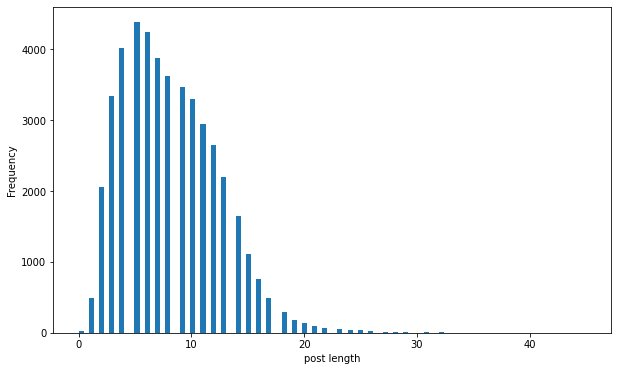

In [ ]:
import matplotlib.pyplot as plt

df['post_length'] = df['post_clean'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
df['post_length'].plot(
    kind='hist',
    bins=100);
plt.xlabel('post length')
df.drop(columns=['post_length'], axis=1, inplace=True)

In [ ]:
df_bully = df[df['label']==1].reset_index().drop(columns='index')
df_nbully = df[df['label']==0].reset_index().drop(columns='index')

In [ ]:
from collections import Counter
cnt1 = Counter()
for i in range (len(df_bully)):
    for word in df_bully.post_clean.loc[[i]].tolist()[0]:
        cnt1[word] += 1
print(cnt1.most_common(50))

[('bitch', 11400), ('``', 4667), ('hoe', 4208), ('get', 3236), ('like', 2876), ('pussy', 2246), ('fuck', 1859), ('go', 1618), ('ass', 1609), ('shit', 1360), ('nigga', 1281), ('u', 1229), ('say', 1114), ('lol', 1025), ('know', 1018), ('girl', 966), ('make', 926), ('sexist', 910), ('_', 882), ('woman', 878), ('amp', 843), ('one', 808), ('man', 806), ('want', 805), ('mkr', 803), ('think', 800), ('see', 796), ('call', 784), ('look', 768), ('would', 750), ('niggas', 739), ('love', 713), ('good', 678), ('white', 674), ('bad', 668), ('hate', 603), ('yo', 602), ('need', 592), ('talk', 586), ('tell', 559), ('come', 547), ('faggot', 544), ('time', 517), ('take', 506), ('fucking', 502), ('people', 497), ('never', 487), ('ya', 483), ('trash', 480), ('back', 479)]


In [ ]:
from collections import Counter
cnt2 = Counter()
for i in range (len(df_nbully)):
    for word in df_nbully.post_clean.loc[[i]].tolist()[0]:
        cnt2[word] += 1
print(cnt2.most_common(50))

[('mkr', 3420), ('``', 1914), ('get', 1554), ('like', 1442), ('go', 1357), ('white', 1233), ('would', 952), ('see', 935), ('people', 933), ('one', 892), ('make', 811), ('say', 778), ('think', 772), ('good', 764), ('look', 743), ('trash', 714), ('know', 700), ('time', 674), ('n', 609), ('want', 597), ('amp', 594), ('kat', 575), ('well', 535), ('year', 517), ('bird', 479), ('take', 470), ('need', 468), ('thing', 457), ('woman', 447), ('day', 436), ('man', 434), ('black', 427), ('youtube', 425), ('back', 416), ('come', 413), ('watch', 403), ('really', 400), ('new', 397), ('find', 393), ('use', 389), ('andre', 386), ('show', 380), ('talk', 376), ('way', 360), ('try', 355), ('even', 355), ('love', 347), ('never', 341), ('give', 337), ('work', 335)]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

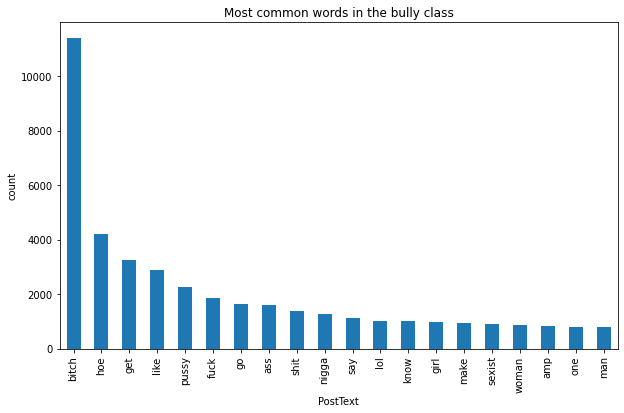

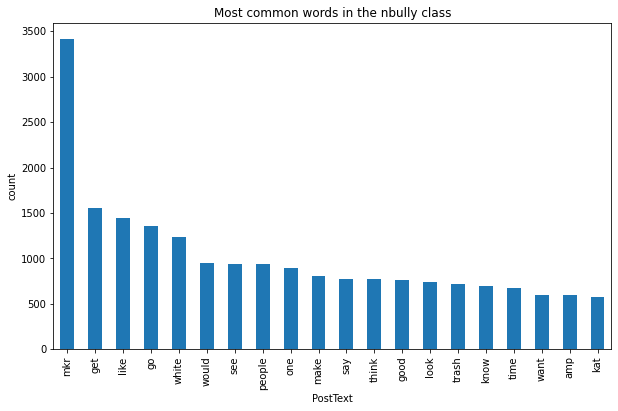

In [ ]:
df['post_clean'] = df['post_clean'].apply(lambda x: ' '.join(x))
df_bully['post_clean'] = df_bully['post_clean'].apply(lambda x: ' '.join(x))
df_nbully['post_clean'] = df_nbully['post_clean'].apply(lambda x: ' '.join(x))

common_words_bully = get_top_n_trigram(df_bully['post_clean'], 20)
common_words_nbully = get_top_n_trigram(df_nbully['post_clean'], 20)

plt.figure(figsize=(10, 6))
df_bully_common = pd.DataFrame(common_words_bully, columns = ['PostText' , 'count'])
df_bully_common.groupby('PostText').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plt.title('Most common words in the bully class')
plt.ylabel('count')

plt.figure(figsize=(10, 6))
df_nbully_common = pd.DataFrame(common_words_nbully, columns = ['PostText' , 'count'])
df_nbully_common.groupby('PostText').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plt.title('Most common words in the nbully class')
plt.ylabel('count');

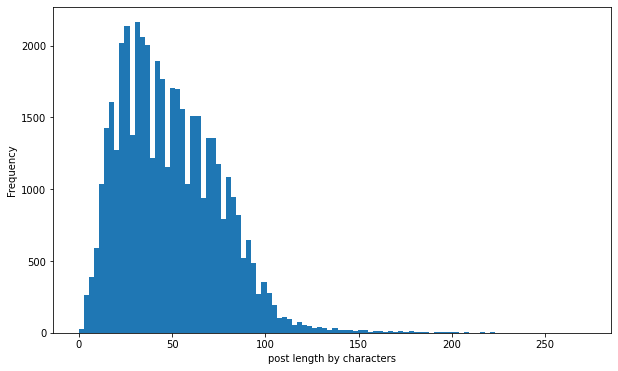

In [ ]:
import matplotlib.pyplot as plt

df['post_length'] = df['post_clean'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
df['post_length'].plot(
    kind='hist',
    bins=100);
plt.xlabel('post length by characters')
df.drop(columns=['post_length'], axis=1, inplace=True)

### Wordcloud Visualization

In [ ]:
# HAVE A PROBLEM WITH THIS GRAPH

(-0.5, 399.5, 199.5, -0.5)

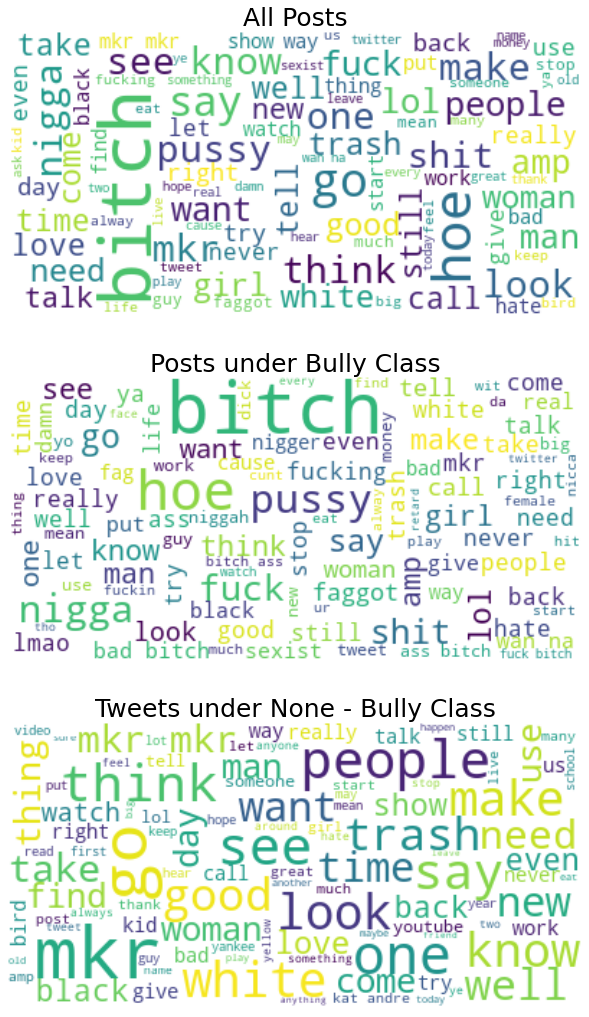

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


post_all = " ".join(post for post in df.post_clean)
post_bully = " ".join(post for post in df_bully.post_clean)
post_nbully = " ".join(post for post in df_nbully.post_clean)

fig, ax = plt.subplots(3, 1, figsize  = (20,18))
# Create and generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(post_all)
wordcloud_bully = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(post_bully)
wordcloud_nbully = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(post_nbully)

# Display the generated image:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Posts', fontsize=25)
ax[0].axis('off')
ax[1].imshow(wordcloud_bully, interpolation='bilinear')
ax[1].set_title('Posts under Bully Class',fontsize=25)
ax[1].axis('off')
ax[2].imshow(wordcloud_nbully, interpolation='bilinear')
ax[2].set_title('Tweets under None - Bully Class',fontsize=25)
ax[2].axis('off')